# Ego Analysis of the BitCoin Data

In [11]:
import os
import glob

# Data Wrangling
import pandas as pd
import numpy as np

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Network Analysis
import networkx as nx
from networkx.algorithms import community
import networkx.algorithms.centrality as nc

## General Analysation

### Get Graph
Generate and print a graph reading the data from all csv files uploaded in the Google Drive

In [12]:
path1 = '../data_tokens/2015-Q1/'
path2 = '../data_tokens/2015-Q2/'
path3 = '../data_tokens/2015-Q3/'
path4 = '../data_tokens/2015-Q4/'
path5 = '../data_tokens/2016-Q1/'
path6 = '../data_tokens/2016-Q2/'
path7 = '../data_tokens/2016-Q3/'
path8 = '../data_tokens/2016-Q4/'
path9 = '../data_tokens/2017-Q1/'
path10 = '../data_tokens/2017-Q2/'

files_15_Q1 = glob.glob(os.path.join(path1, "*.csv"))
files_15_Q2 = glob.glob(os.path.join(path2, "*.csv"))
files_15_Q3 = glob.glob(os.path.join(path3, "*.csv"))
files_15_Q4 = glob.glob(os.path.join(path4, "*.csv"))
files_16_Q1 = glob.glob(os.path.join(path5, "*.csv"))
files_16_Q2 = glob.glob(os.path.join(path6, "*.csv"))
files_16_Q3 = glob.glob(os.path.join(path7, "*.csv"))
files_16_Q4 = glob.glob(os.path.join(path8, "*.csv"))
files_17_Q1 = glob.glob(os.path.join(path9, "*.csv"))
files_17_Q2 = glob.glob(os.path.join(path10, "*.csv"))

df_15_Q1 = pd.concat((pd.read_csv(f) for f in files_15_Q1), ignore_index=True)
df_15_Q2 = pd.concat((pd.read_csv(f) for f in files_15_Q2), ignore_index=True)
df_15_Q3 = pd.concat((pd.read_csv(f) for f in files_15_Q3), ignore_index=True)
df_15_Q4 = pd.concat((pd.read_csv(f) for f in files_15_Q4), ignore_index=True)
df_16_Q1 = pd.concat((pd.read_csv(f) for f in files_16_Q1), ignore_index=True)
df_16_Q2 = pd.concat((pd.read_csv(f) for f in files_16_Q2), ignore_index=True)
df_16_Q3 = pd.concat((pd.read_csv(f) for f in files_16_Q3), ignore_index=True)
df_16_Q4 = pd.concat((pd.read_csv(f) for f in files_16_Q4), ignore_index=True)
df_17_Q1 = pd.concat((pd.read_csv(f) for f in files_17_Q1), ignore_index=True)
df_17_Q2 = pd.concat((pd.read_csv(f) for f in files_17_Q2), ignore_index=True)

df_list = []
df_list.append(df_15_Q1)
df_list.append(df_15_Q2)
df_list.append(df_15_Q3)
df_list.append(df_15_Q4)
df_list.append(df_16_Q1)
df_list.append(df_16_Q2)
df_list.append(df_16_Q3)
df_list.append(df_16_Q4)
df_list.append(df_17_Q1)
df_list.append(df_17_Q2)

2015 - Q1


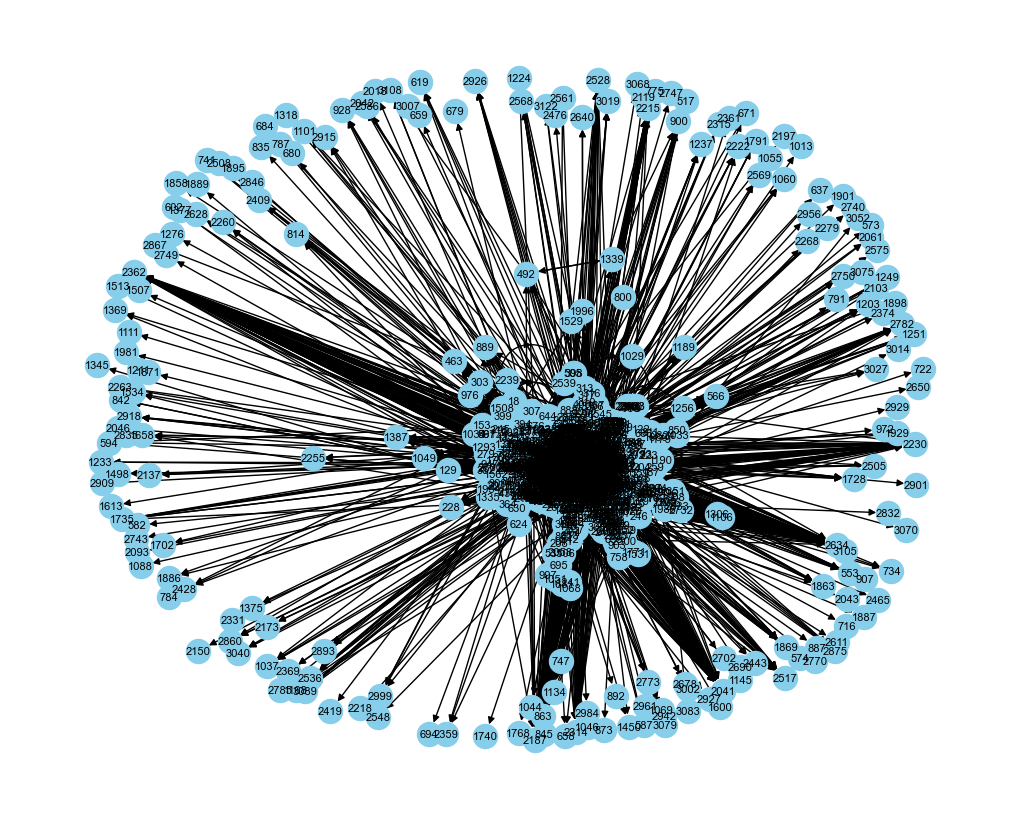

The graph has 2026 nodes and 28777 edges.
Connectivity:  1
2015 - Q2


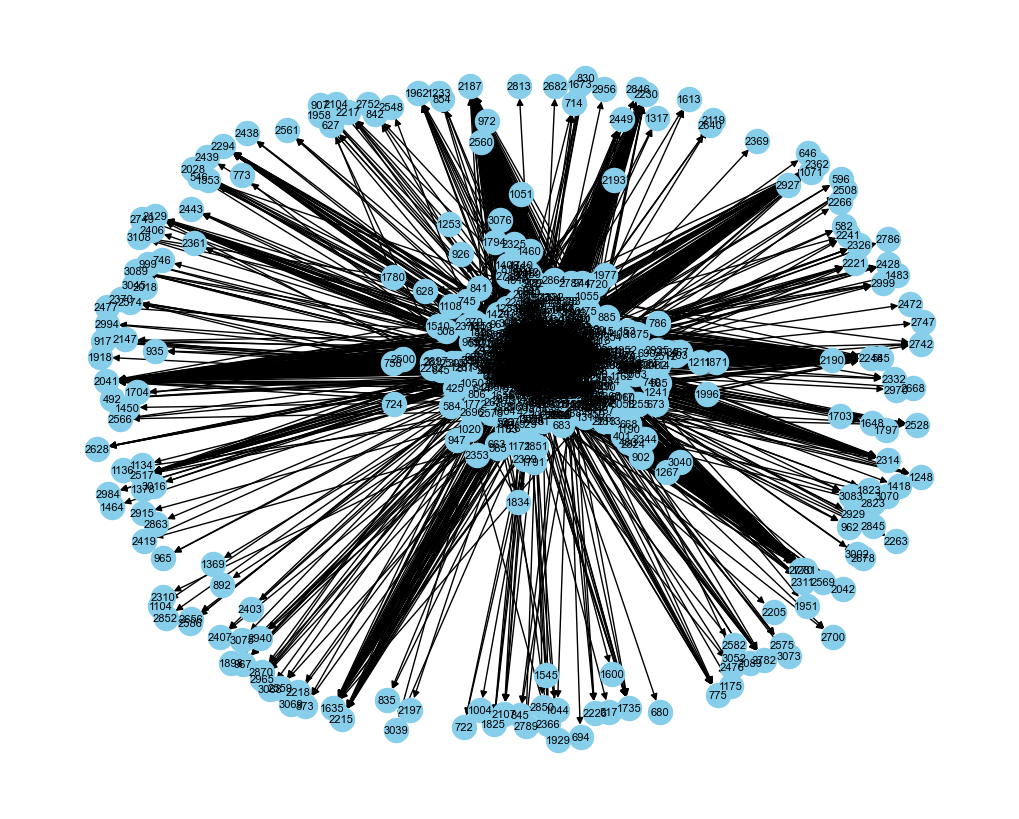

The graph has 2221 nodes and 36305 edges.
Connectivity:  0
2015 - Q3


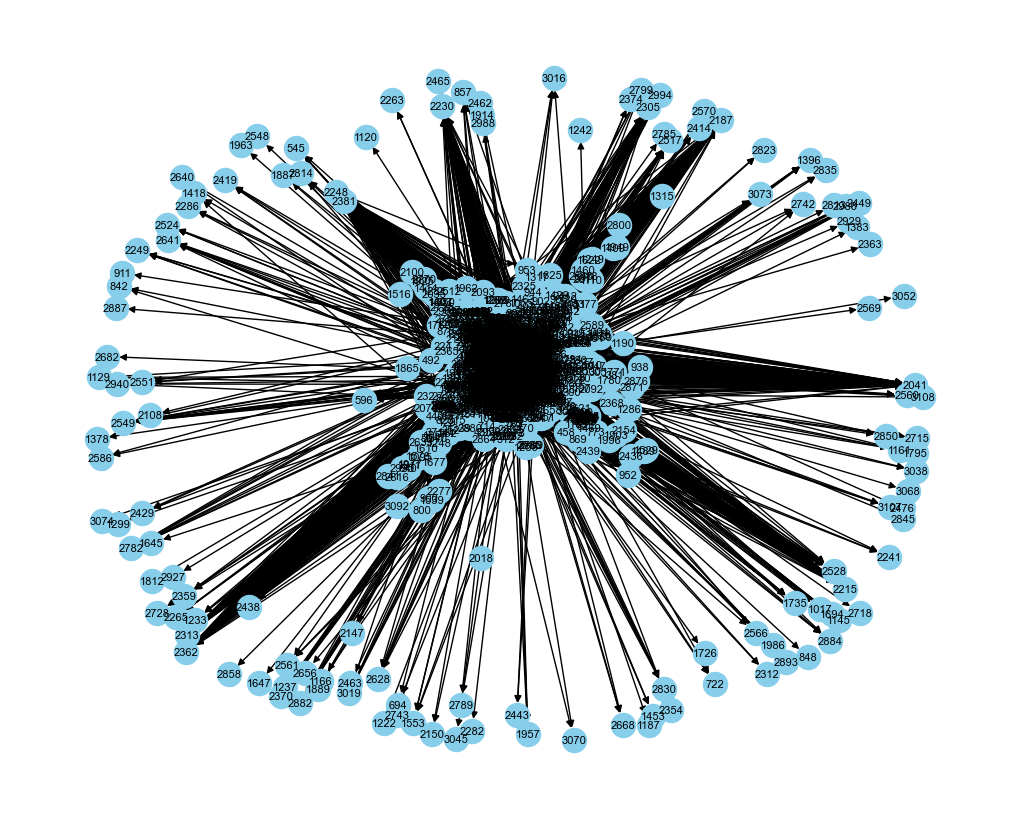

The graph has 2473 nodes and 43930 edges.
Connectivity:  1
2015 - Q4


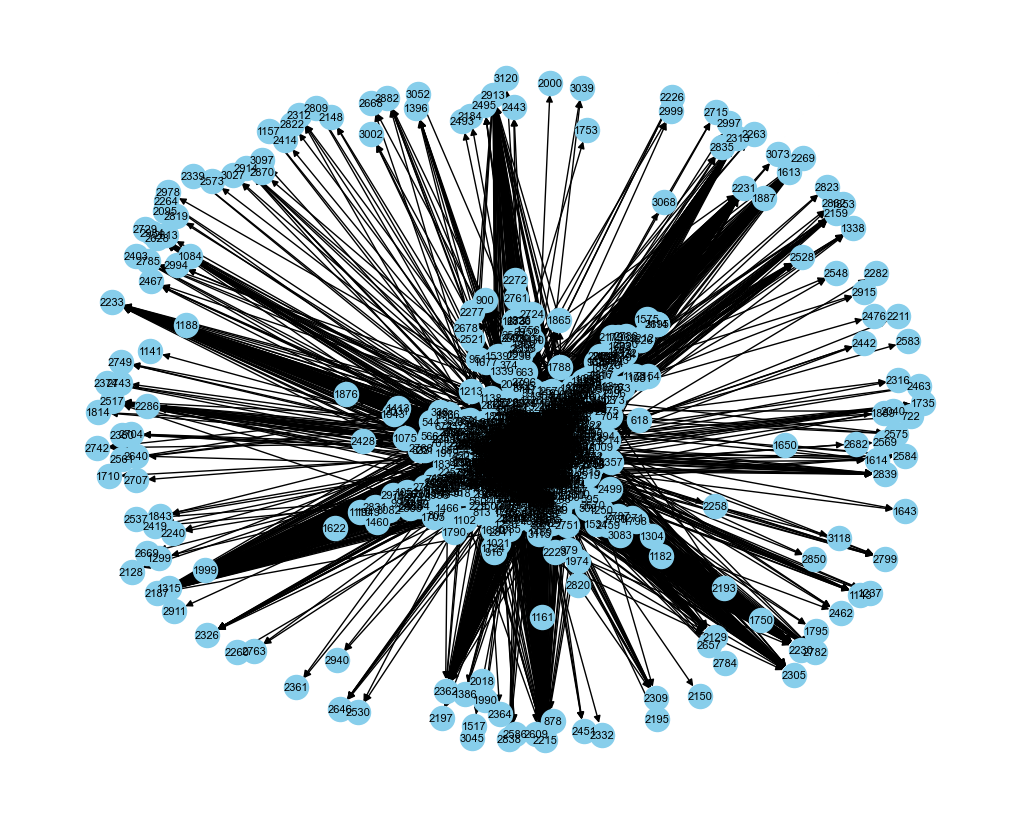

The graph has 2903 nodes and 56993 edges.
Connectivity:  0
2016 - Q1


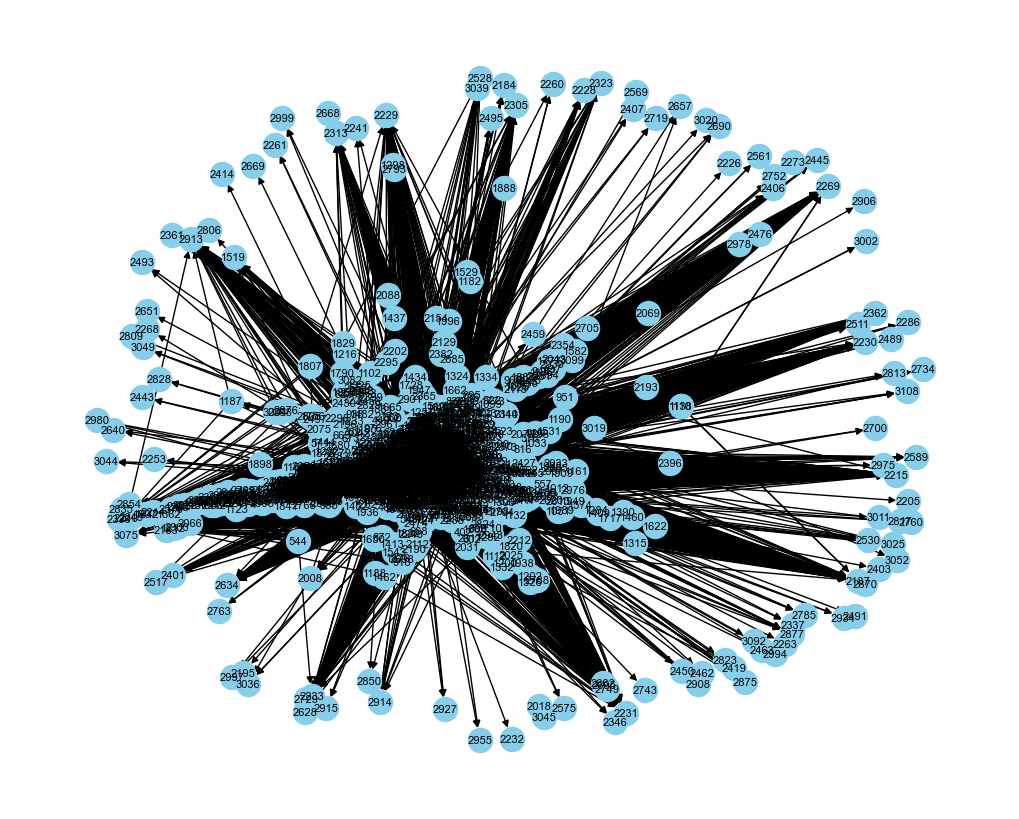

The graph has 3123 nodes and 83834 edges.
Connectivity:  0
2016 - Q2


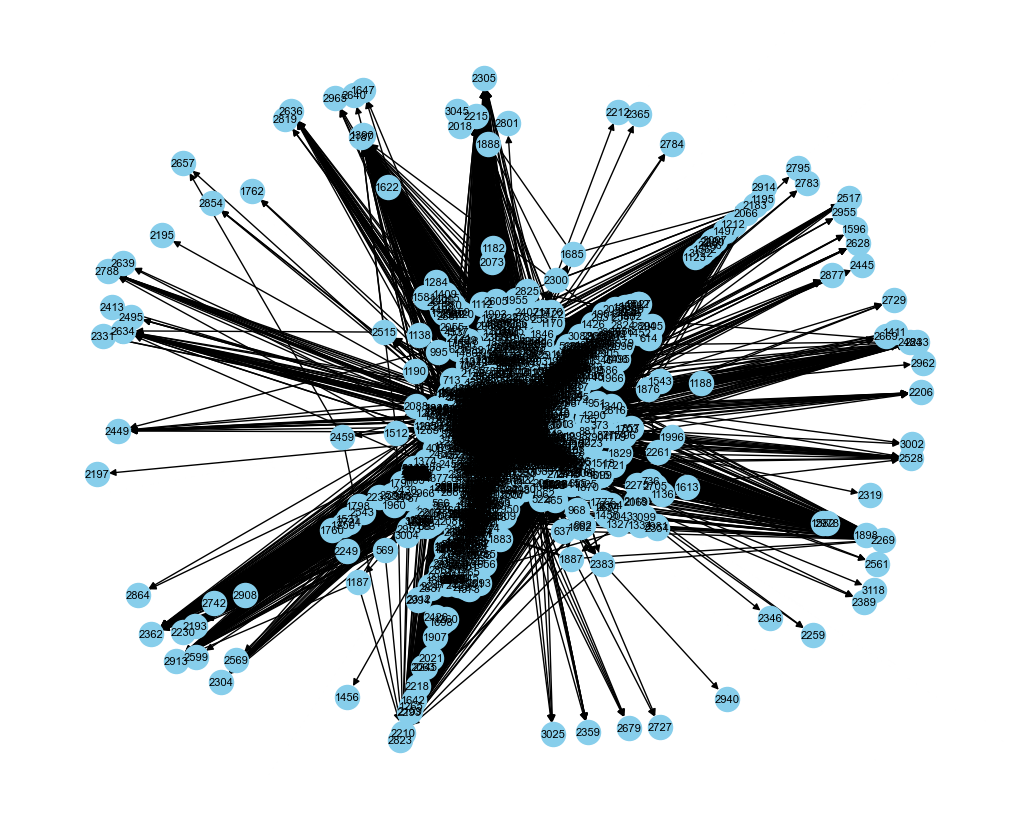

The graph has 3116 nodes and 120599 edges.
Connectivity:  0
2016 - Q3


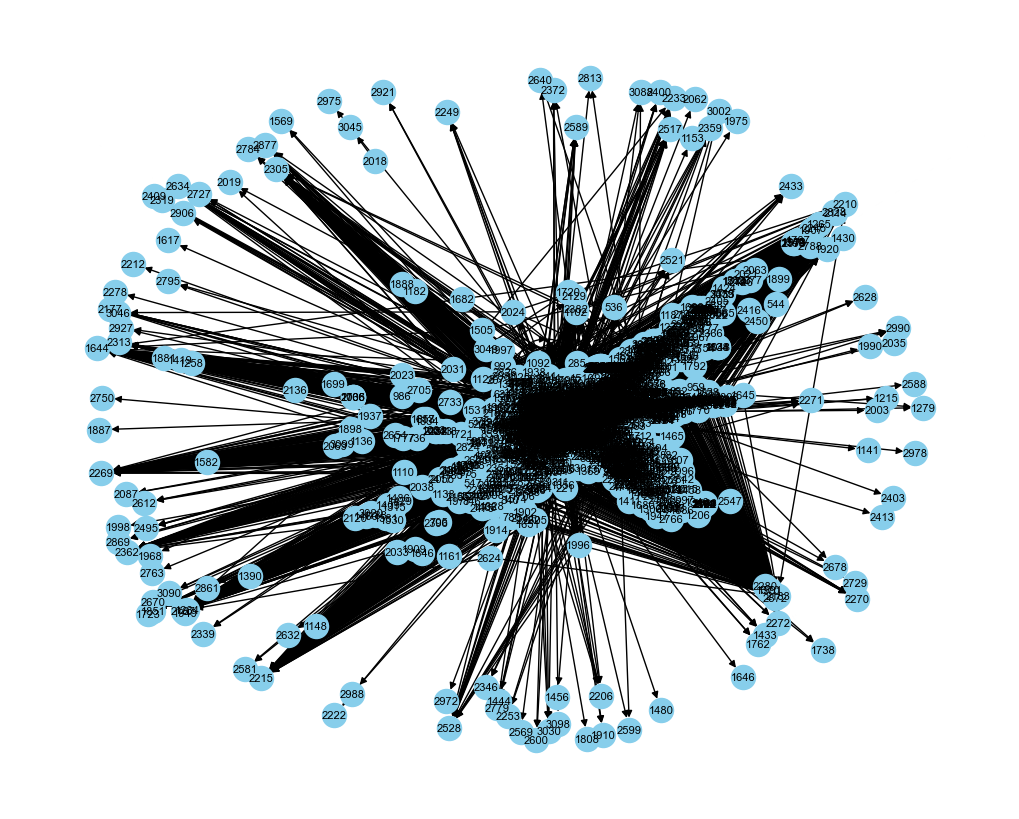

The graph has 2986 nodes and 137074 edges.
Connectivity:  0
2016 - Q4


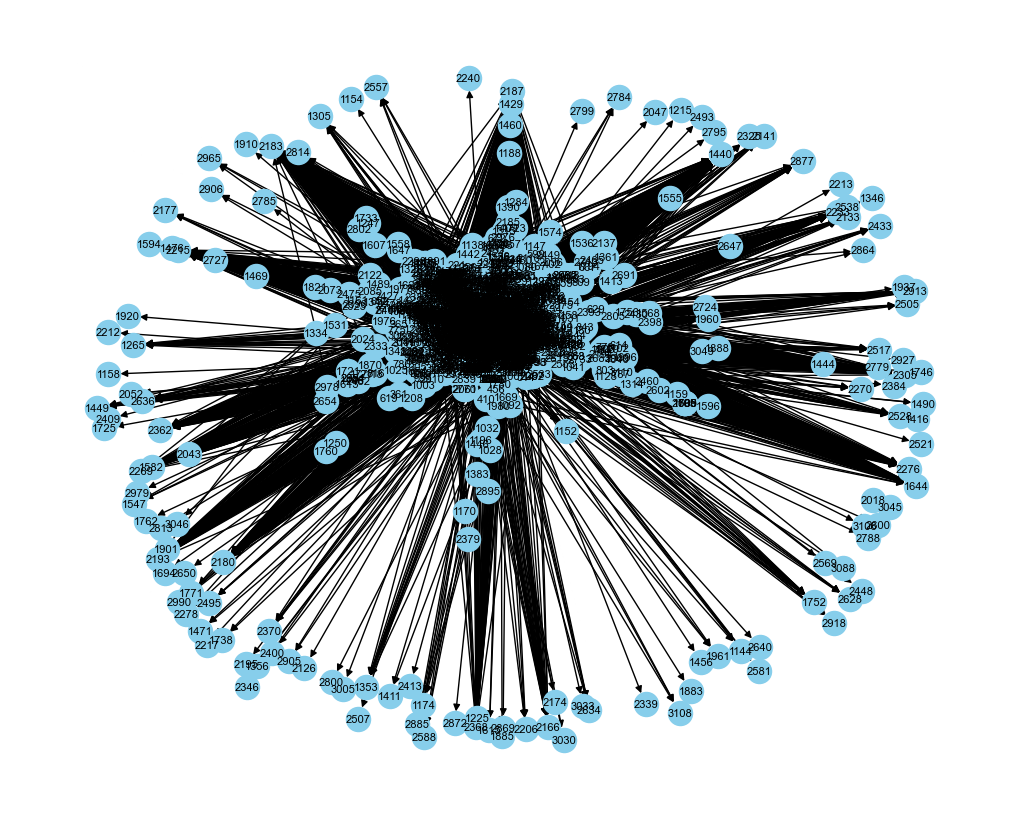

The graph has 2801 nodes and 73776 edges.
Connectivity:  0
2017 - Q1


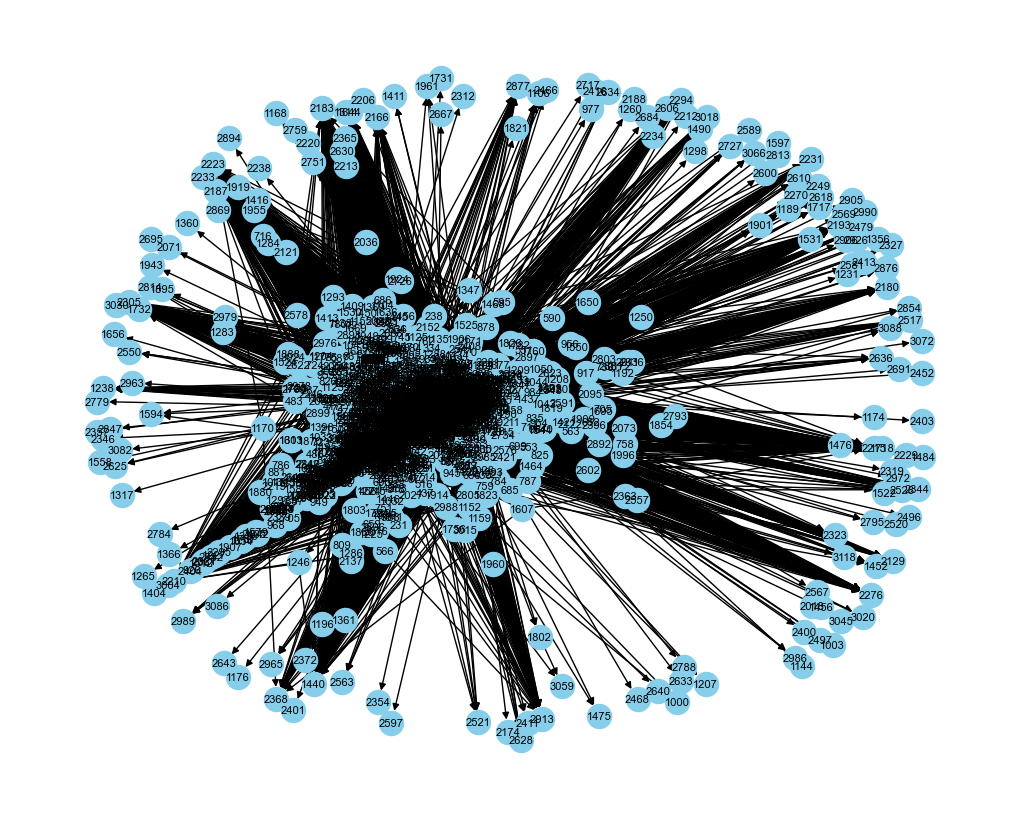

The graph has 2564 nodes and 45465 edges.
Connectivity:  0
2017 - Q2


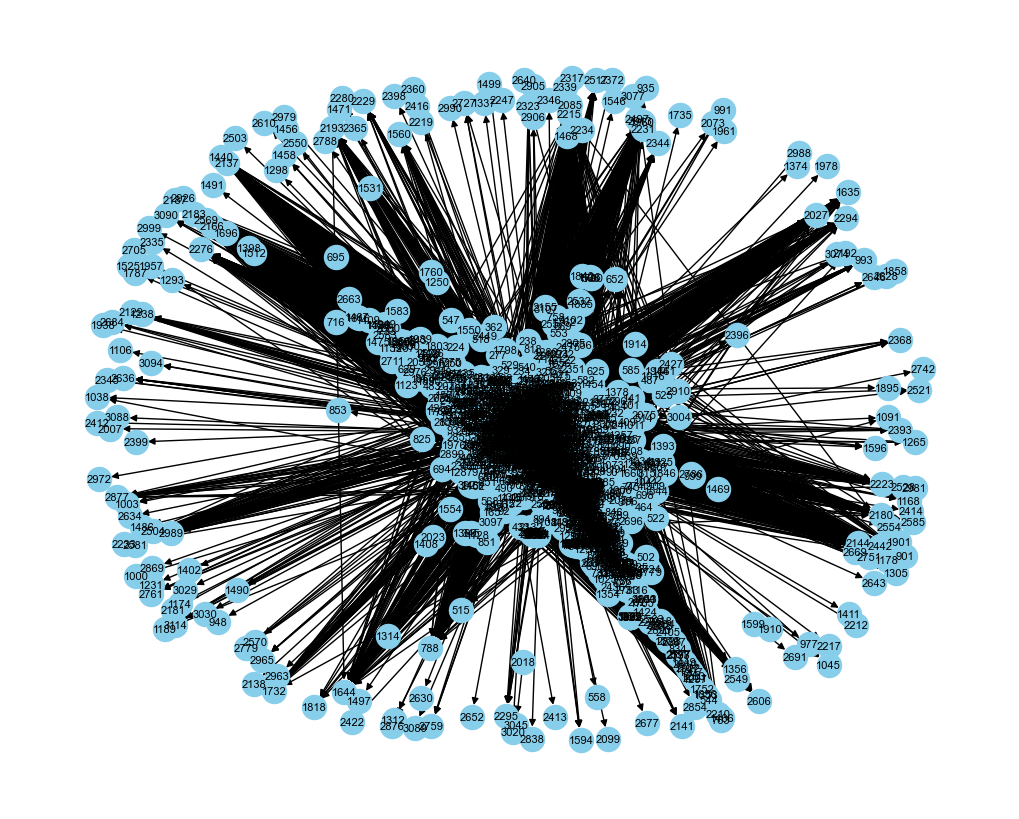

The graph has 2285 nodes and 36217 edges.
Connectivity:  0


In [13]:
# Plot as directed Graph
i = 0
for df in df_list:
    if i == 0: print("2015 - Q1")
    if i == 1: print("2015 - Q2")
    if i == 2: print("2015 - Q3")
    if i == 3: print("2015 - Q4")
    if i == 4: print("2016 - Q1")
    if i == 5: print("2016 - Q2")
    if i == 6: print("2016 - Q3")
    if i == 7: print("2016 - Q4")
    if i == 8: print("2017 - Q1")
    if i == 9: print("2017 - Q2")
    i += 1
    Graphtype = nx.Graph()
    G = nx.from_pandas_edgelist(df, 'Source', 'Target', ['value', 'nb_transactions'], create_using=nx.DiGraph)
    plt.figure(figsize=(10, 8))
    nx.draw(G, with_labels=True, node_color='skyblue', font_size=8, font_color='black', edge_color='black', width=1, edge_cmap=plt.cm.Blues)
    plt.show()
    
    # Use as normal Graph for Analysis
    G = nx.from_pandas_edgelist(df, 'Source', 'Target', ['value', 'nb_transactions'], create_using=nx.Graph)

    # Show the connectivity of the analyzed graph
    print("The graph has", G.number_of_nodes(), "nodes and", G.number_of_edges(),"edges.")
    print("Connectivity: ", nx.node_connectivity(G))

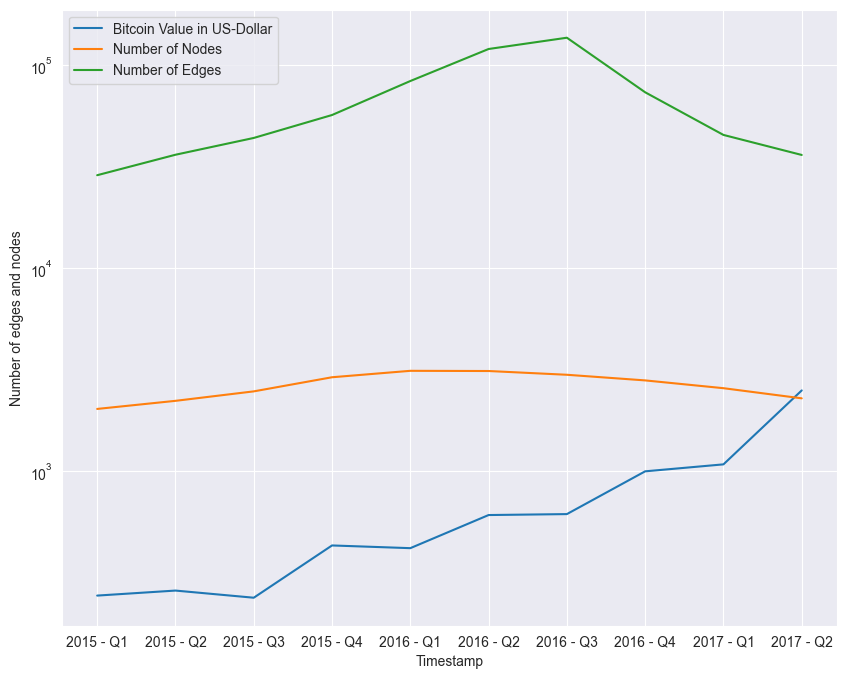

In [21]:
## Plot the number of nodes for quaters
number_of_nodes = [2026, 2221, 2473, 2903, 3123, 3116, 2986, 2801, 2564, 2285]
number_of_edges = [28777, 36305, 43930, 56993, 83834, 120599, 137074, 73776, 45465, 36217]
bitcoin_values = [243.39, 257.66, 237.57, 430.05, 417.01, 607.37, 613.93, 997.69, 1079.75, 2499.98]
timestamp = ["2015 - Q1", "2015 - Q2", "2015 - Q3", "2015 - Q4", "2016 - Q1", "2016 - Q2", "2016 - Q3", "2016 - Q4", "2017 - Q1", "2017 - Q2"]
plt.figure(figsize=(10, 8))
plt.plot(timestamp, bitcoin_values, timestamp, number_of_nodes, timestamp, number_of_edges)
plt.xlabel("Timestamp")
plt.ylabel("Number of edges and nodes")
plt.yscale('log')
plt.legend(['Bitcoin Value in US-Dollar', 'Number of Nodes', 'Number of Edges'])
plt.show()